# **Analysis on Hotel Booking Cancellation**






# **Alvin Chow Wei Hong, Chok Yong Kang, Liew Jie Qi, Loo Jia Yi** 

*Faculty of Computing and Information Technology, Tunku Abdul Rahman University College, Kuala Lumpur 53300, Malaysia*

<alvincwh-wm17@student.tarc.edu.my>\
<chokyk-wm17@student.tarc.edu.my>\
<liewjq-wm17@student.tarc.edu.my>\
<loojy-wm17@student.tarc.edu.my> 

## **Abstract**

This report presents the analysis on Hotel Booking Cancellation. The hotel involved categorized to two types, which is Resort Hotel and City Hotel. Hotel Reservation cancellation is uncommon in the hotel industry, each cancellation means a lost revenue opportunity that can never be recovered. Therefore, if we can predict if a guest would cancel a reservation, hotels could contact guests that most like to cancel to confirm more efficiently and to resell room to optimize revenues. 

## **Business Understanding**

### **Objective**

Resort Hotel and City Hotel involved in reservation cancellation is uncommon in the hotel industry, each cancellation means a lost revenue opportunity that can never be recovered. Therefore, if we can predict if a guest would cancel a reservation, hotels could contact guests that most like to cancel to confirm more efficiently and to resell room to optimize revenues. 

## **Current Situation**

### **Inventory of Resources**

The student from Bachelor Degree in Computer Science (Software Engineering) which are Alvin Chow Wei Hong (19WMR09723), Chok Yong Kang (19WMR09733), Liew Jie Qi (19WMR11076) and Loo Jia Yi (19WMR11069) are exploring prediction on the hotel reservation cancellation. The dataset used is from Kaggle (https://www.kaggle.com/jessemostipak/hotel-booking-demand). The data originally from Nuno Antonio, Ana Aimeida and Luis Nunes article, "Hotel Booking Demand Datasets". The software used in developing the supervised learning is Google Colab, which is one of Google product

### **Requirements, assumptions and constraints**

The project is required to be completed by 11:59 p.m of 13th September 2020. The dataset is accessible by the public, therefore there is no legality issues.

### **Risk and Contingencies**

The missing values are most likely causing the prediction to be failed as inaccurancy is higher . If there is quite alot of missing values, the missing values will be replaced. If the missing value is quite less, it will be deleted.

### **Costs and Benefits**

Most opportunity to resell the room to be predicted cancel and to optimize revenues. 

## **Data Mining Goals**

### **Business Success Criteria**

The achievemenet of business objective indicate the success in project implmentation

### **Data Mining Success Criteria**

The data mining is considered as a sucess due to high accurancy, precision and recall

## **Project Plan**

Before we split the data into training set and testing test, data preprocessing is required to be done. It is crucial in any data mining process as they will directly impact success rate of the project. In this context, the categorical and numerical columns are identified. Since unclean data such as missing attribute, attribute values, contain noise or outliers and duplicate or wrong data may degrade the quality of result. Thus, data cleaning process is important to be executed for the dataset.  After that, we proceed to data modelling at which the dataset is splitted into 70% train set and 30% test set. For the algorithm, we have implemented Logistic Regression, Decision Tree, Random Forest and Gaussian Naves Bayes. The evaluation is based on the aspects of accuracy, precision, recall and F1 score.

### **Initial assessment of tools and implementation**

In [ ]:
#for data preprocessing
import pandas as pd

#for matrix math
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#style plotting by using seaborn
sns.set(style='darkgrid')

#graph plotting by using matplotlib
%matplotlib inline

#to important csv from collab directory
import os
for dirname, _, filenames in os.walk('/content/hotel_bookings.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load modules for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Load module for ROC
from sklearn.metrics import roc_curve, roc_auc_score

## **Data Understanding**

### **Describe data**

In [ ]:
# load the dataset
df = pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The dataset has 32 columns and with 111,304 entries in total. The data types for the dataset consists of objects type, integer type, and float type in which 12 columns are object type, 9 columns is integer type and 11 columns is float type. 

**Float type**

"children", "is_repeated_guest", "previous_cancellations", previous_bookings_not_canceled, "booking_changes", "agent", "company", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"

**Integer type**

"is_canceled", "lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "babies"

**Object type**

"hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status", "reservation_status_date" 

**Categorical Values**

"is_canceled", "arrival_date_month", "meal", "market_segment", "distribution_channel", "reserved_room_type", "is_repeated_guest", "deposit_type", "customer_type"

**Numerical Values**

"lead_time", "arrival_date_week_number", "arrival_date_day_of_month", "days_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_booking_not_canceled", "required_car_parking_spaces", "total_of_special_requests", "adr"

As in further investigation, the dataset contains 121,045 missing values in total. The distribution of the missing values are as follow: 
488 missing values in country
15825 missing values in agent and
104,732 missing values in company


**X variable**

All columns are X except "is_canceled"

**Y variable**

"is_canceled" implies the the booking is canceled or not.

### **Expolatory Data Analysis**

**Hotel that has more cancelations**

In [ ]:
#code start here
print('There are ' + str(len(df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)])) + ' cancelations at Resort Hotel')
print('There are ' + str(len(df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)])) + ' cancelations at City Hotel')

There are 11122 cancelations at Resort Hotel
There are 33102 cancelations at City Hotel


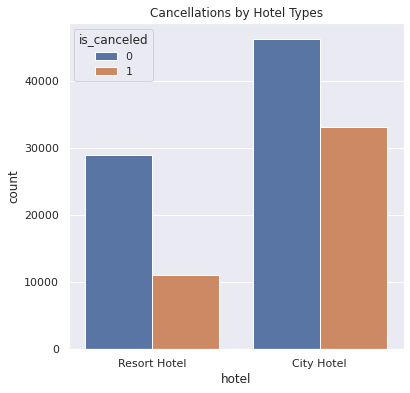

In [ ]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellations by Hotel Types')
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.show()

In [ ]:
# % of cancellations in Resort Hotel
df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [ ]:
# % of cancellations in City Hotel
df[df['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

City Hotel has a higher cancellations rate of 41.78% comparing to Resort Hotel’s 27.98% 

**Is Lead Time affecting cancelation rate**

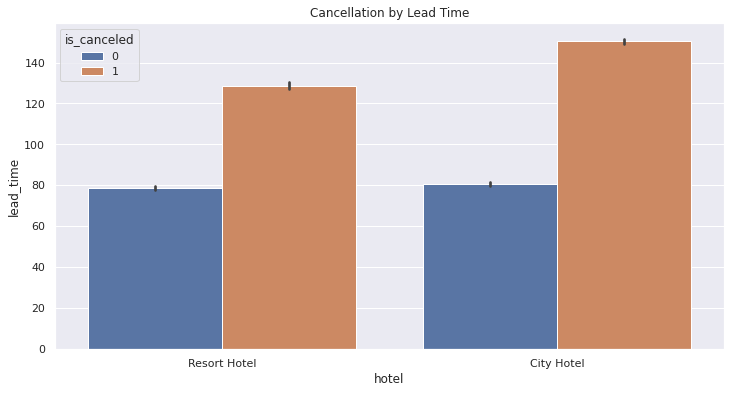

In [ ]:
plt.figure(figsize=(12,6))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='hotel',y='lead_time',hue='is_canceled',data=df)
plt.show()

The longer the lead time, the reservation more likely to be canceled. 

**Cancelation by Market Segments and ADR**

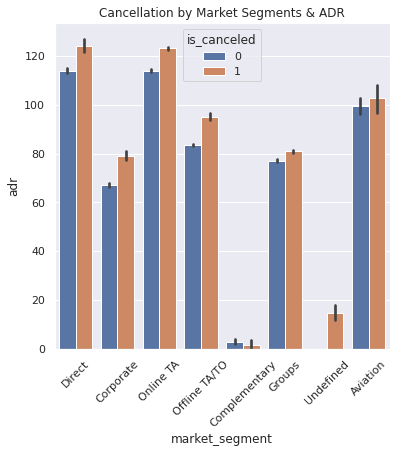

In [ ]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Market Segments & ADR')
plt.xticks(rotation=45) 
sns.barplot(x='market_segment',y='adr',hue='is_canceled',data=df)
plt.show()

• The cancellation percentage of groups is higher than other segments

• The cancellation number of Online TA is higher than other segments

• Almost all canceled reservations have a higher ADR.

**Distribution Channel**

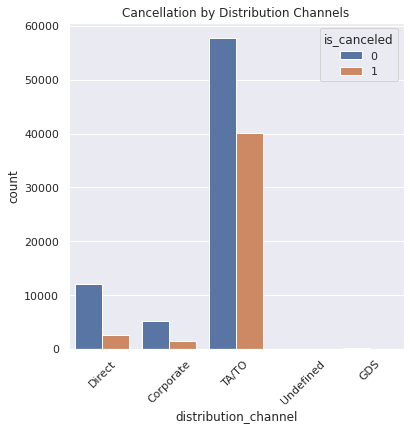

In [ ]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Distribution Channels')
plt.xticks(rotation=45) 
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.show()

Reservations from Travel Agents or Tour Operators are more likely to be canceled

**Cancelation by deposit types**

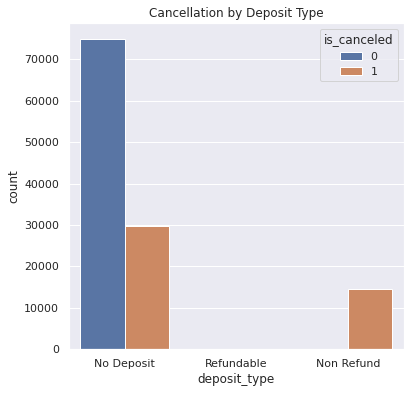

In [ ]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Deposit Type')
sns.countplot(x='deposit_type',hue='is_canceled',data=df)
plt.show()

Reservations with No-deposit or Non-refund policy are more likely to be canceled

**Monthly Cancellations and Customers by Hotel Types**

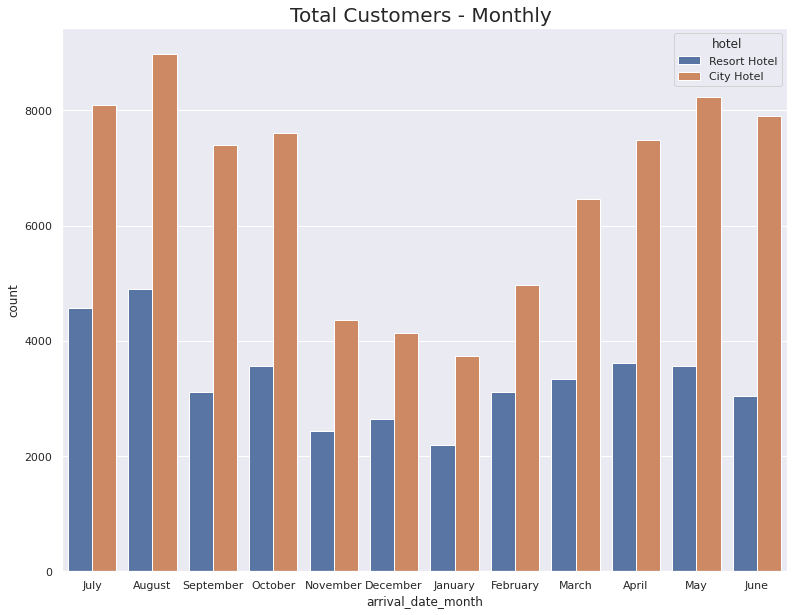

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df)

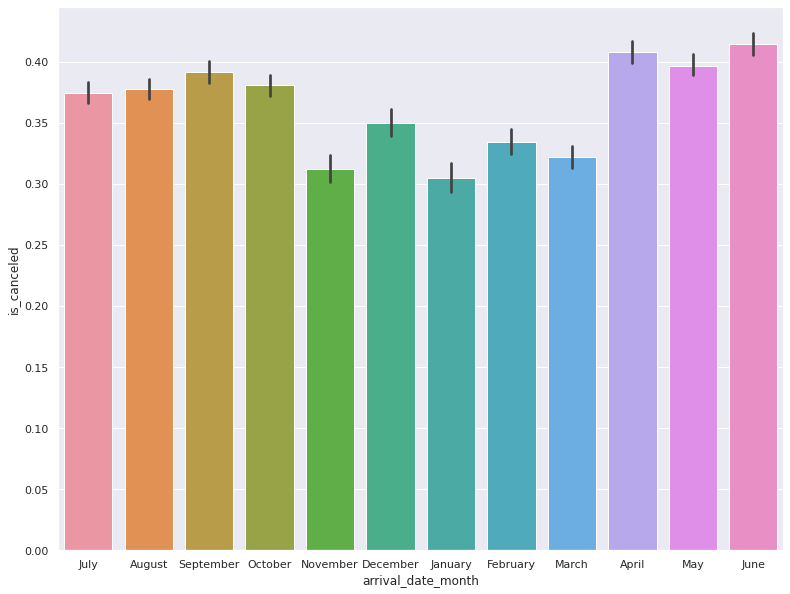

In [ ]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = df);

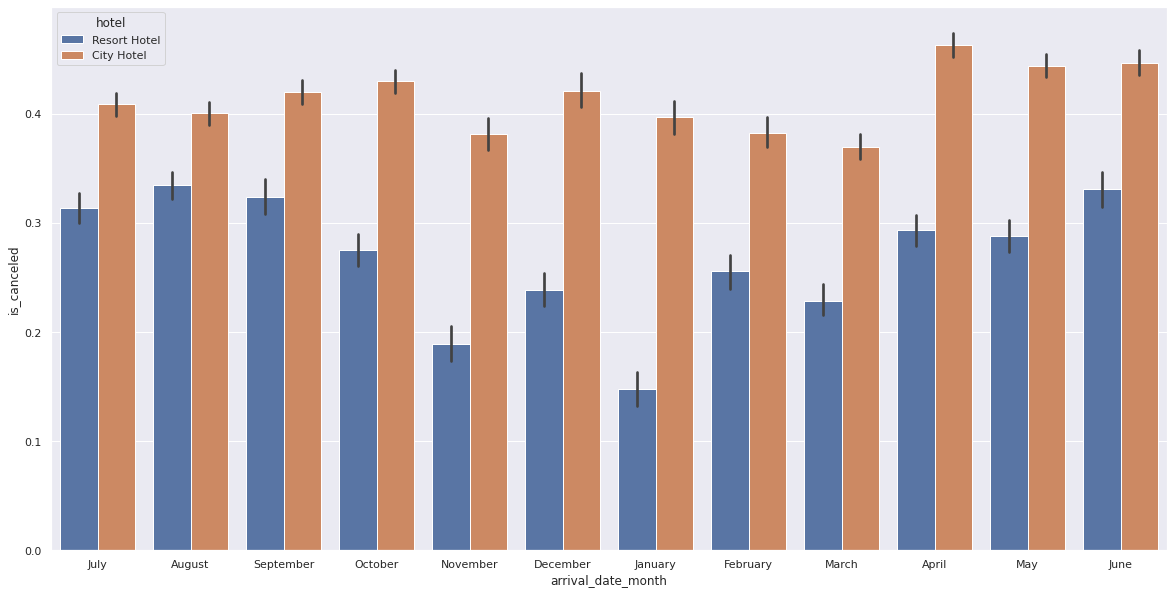

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = df);


*   Fewer customer come in winter months (November, December, January, and February, March)
*   The cancellation rates quite normal that it appear less in winter months
*   The fact that total cancellation rates of winter months are low is that the booking rate of the resort hotels are low in these months. 
*   In short, the possibility of cancellation of resort hotels in winter is very low






### **Data Quality**

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## **Data Preparation**

### **Select Data**

Not all data columns are selected in predicting the outcome of the booking cancelation prediction. "reservation_status", "agent", and "company" are removed from the data columns. Another reason for "reservation_status" to be removed because of it abuse the accuracy of all the model (100% accuracy) as it direct way to predict cancellations. Some of the missing value and confusing values that exist in the dataset are handle in a proper and formal way to maximize the accuracy, precision and recall of the results. 

**Handling Missing value**

**Numerical Data:** "children" has 4 missing values, we assumed the customer do not have children, replaced the missing values with '0'.
**Categorical Data:** Originally the missing values should replace with the maximum occurance of data, but "agent" and "company" missing values hold the greater ratio between the filled values, as its hard to make decision which value are more suitable to fill the missing values, we decided to drop it.

In [ ]:
#we drop "agent" and "company" because there are too many missing values
df.drop(columns=['agent', 'company'],inplace=True)
df.dropna(axis=0,inplace=True)
df.shape

(118898, 30)

In [ ]:
df['is_canceled'].value_counts(normalize=True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

In [ ]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

In [ ]:
#is_canceled & reservation_status provide same information, we can drop reservation_status for model building purpose 
df.drop(columns=['reservation_status'],inplace=True)
df.dropna(axis=0,inplace=True)
df.shape

(118898, 29)

In [ ]:
df.describe() #put here temporarily

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#"children" have 4 missing value, we assumed the customer do not have any children.
df['children'] = df['children'].fillna(0)

In [ ]:
#remove later, check null value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#remove later, check again the entries
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


**Handling Confusing Value**

In "meal", "SC" and "Undefined" stand for no meal, hence we decided to replace "Undefined" with "SC" to demolish confusion. 

In [ ]:
df['meal'].value_counts()

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [ ]:
# "meal" contains values "Undefined", which is equal to SC
df['meal'].replace('Undefined','SC',inplace=True)

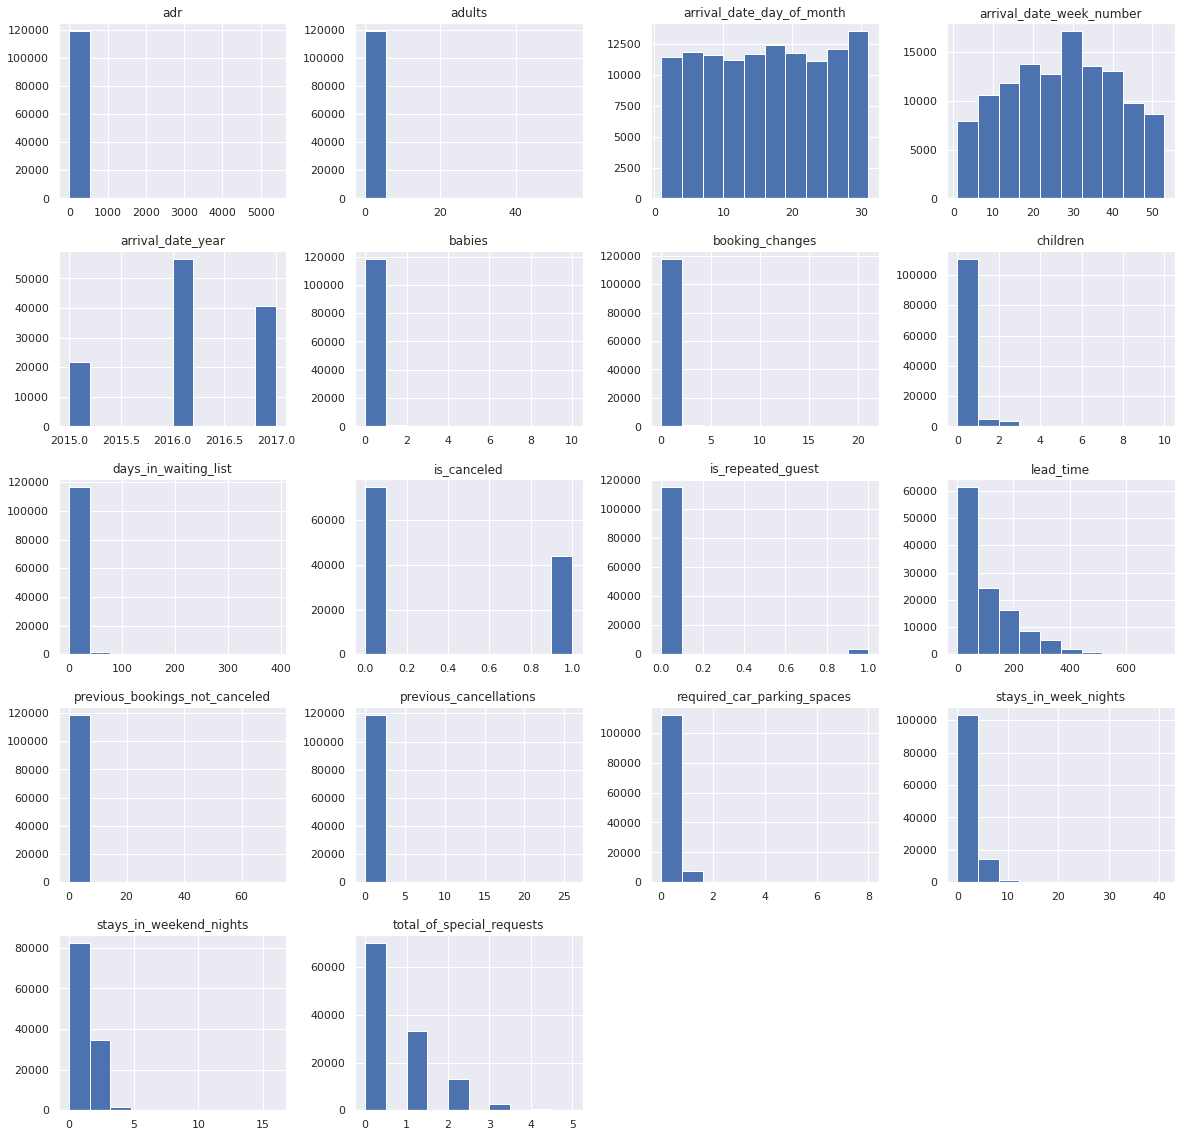

In [ ]:
df.hist(figsize=(20,20))
plt.show()

**Data Cleaning**

There is impossible 0 number of guest in the booking, logically it should some entries error, we remove all the values with 0 number of guest.

In [ ]:
#derived attributes
len(df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)])

170

In [ ]:
#genereated record
zero_guests = df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)].index
df.drop(zero_guests, inplace=True)
df.shape

(118728, 29)

In [ ]:
cat_cols=['is_canceled','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type',
      'is_repeated_guest','deposit_type','customer_type']
df[cat_cols] = df[cat_cols].astype('category')
num_cols = ['lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
        'adults','children','babies','previous_cancellations','previous_bookings_not_canceled','required_car_parking_spaces',
        'total_of_special_requests','adr']

**Merge Categorical Data and Numerical Data**

After the data preprocessing have been done, the processed and cleaned data are merge by using the Data Frame function in tabular fashion rows and columns.

In [ ]:
model_df = df[cat_cols+num_cols]
model_df.shape

(118728, 22)

**Correlation**

Correlation test is done to prevent there is any there is no metric that able to heavily impact or dominates other feature total.

In [ ]:
model_df.corr()
#if can list the ranking

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr
lead_time,1.000000,0.126875,0.002402,0.084327,0.165913,0.115020,-0.038580,-0.021231,0.085949,-0.071164,-0.115707,-0.096710,-0.068174
arrival_date_week_number,0.126875,1.000000,0.066577,0.018086,0.015531,0.025956,0.005527,0.010058,0.035354,-0.020876,0.001770,0.025810,0.075699
arrival_date_day_of_month,0.002402,0.066577,1.000000,-0.015739,-0.027723,-0.001884,0.014570,-0.000541,-0.027024,0.000116,0.008158,0.003078,0.030053
stays_in_weekend_nights,0.084327,0.018086,-0.015739,1.000000,0.490100,0.093397,0.045780,0.018523,-0.012998,-0.040727,-0.018099,0.072146,0.048701
stays_in_week_nights,0.165913,0.015531,-0.027723,0.490100,1.000000,0.095399,0.044723,0.020343,-0.014252,-0.047478,-0.024431,0.067360,0.065344
adults,0.115020,0.025956,-0.001884,0.093397,0.095399,1.000000,0.028603,0.017642,-0.007278,-0.105795,0.016107,0.122418,0.221413
children,-0.038580,0.005527,0.014570,0.045780,0.044723,0.028603,1.000000,0.024101,-0.024775,-0.020368,0.057059,0.081811,0.325228
babies,-0.021231,0.010058,-0.000541,0.018523,0.020343,0.017642,0.024101,1.000000,-0.007496,-0.006306,0.036979,0.097654,0.028455
previous_cancellations,0.085949,0.035354,-0.027024,-0.012998,-0.014252,-0.007278,-0.024775,-0.007496,1.000000,0.154127,-0.018500,-0.048681,-0.066233
previous_bookings_not_canceled,-0.071164,-0.020876,0.000116,-0.040727,-0.047478,-0.105795,-0.020368,-0.006306,0.154127,1.000000,0.046798,0.037551,-0.069786


## **Modelling**

**Splitting Data**

The dataset will be split into training set and test set. The training set will be used to train the model and testing set will be used to test the model. The data splitting is based on percentange. The training set is 70% of the dataset while testing set is 30% of the dataset.

In [ ]:
# Create dummy variables
df_dummies = pd.get_dummies(model_df.drop(columns=['is_canceled']))
df_dummies.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,is_repeated_guest_0,is_repeated_guest_1,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,1,0,0,2,0.0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,13,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,0,1,98.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
y = model_df['is_canceled']
X = df_dummies #dropped "is_canceled"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


#load module and all the algorithm tomoorrow

In [ ]:
#ROC module (Ignore this)
def ROC(y_test, y_prob):
    
 # Create true and false positive rates
 false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
 # Plot ROC curve
 plt.title('Receiver Operating Characteristic')
 plt.plot(false_positive_rate, true_positive_rate)
 plt.plot([0, 1], ls="--")
 plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
 plt.ylabel('True Positive Rate')
 plt.xlabel('False Positive Rate')
 plt.show()  

**Algorithms Selected**

There are total 4 supervised learning algorithms selected to model the dataset in order to find the best modelling technique to solve the business problem is which predicting booking cancelation. 

**1) Logistric Regression**

Logistic regression is a statistical model that in basic form uses a logistic function to model binary dependant variable, although many more complex extension exist. In regression analysis, logical regession is estimating the parameter of a logistic model. Mathematically, a binary logistic model has a dependant variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_lr_pred = lr.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))

Accuracy: 0.8044
[[20893  1420]
 [ 5546  7760]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     22313
           1       0.85      0.58      0.69     13306

    accuracy                           0.80     35619
   macro avg       0.82      0.76      0.77     35619
weighted avg       0.81      0.80      0.79     35619



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**K-fold validation**

In [ ]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7140354423556364


**ROC**

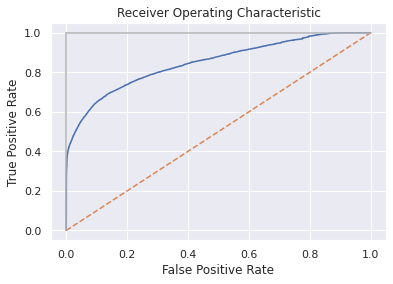

In [ ]:
y_prob = lr.predict_proba(X_test_std)[:,1]
ROC(y_test, y_prob)  

**2) Decision Tree**

In computer science, Decision tree learning uses a decision tree to go from a observation about an item, to conclusions about the item's target value. It is one of the predictive modelling approaches uses in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees. In these tree structures, leaves present the class labels and branches represent the conjuctions of the features that lead to those class labels. Decision trees where the target variable can take continuous values are called regression tree.

**Decision Tree Accuracy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_std, y_train)
y_clf_pred = clf.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))

Accuracy: 0.8134
[[18992  3321]
 [ 3326  9980]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22313
           1       0.75      0.75      0.75     13306

    accuracy                           0.81     35619
   macro avg       0.80      0.80      0.80     35619
weighted avg       0.81      0.81      0.81     35619



**K-fold validation**

In [ ]:
LogD = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(LogD, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6888012937133616


**Evaluate Decision Tree performance using ROC**

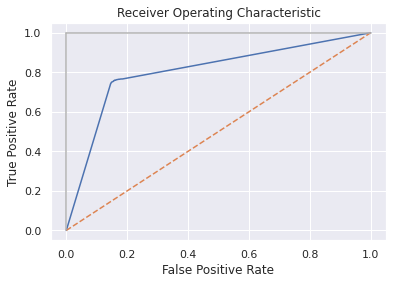

In [ ]:
y_prob = clf.predict_proba(X_test_std)[:,1]
ROC(y_test, y_prob)

**3) Random Forest**

Random forest or random decision forests are an assemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfl = RandomForestClassifier()
rfl.fit(X_train_std, y_train)
y_rfl_pred = rfl.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_rfl_pred))
print(confusion_matrix(y_test, y_rfl_pred))
print(classification_report(y_test,y_rfl_pred))

Accuracy: 0.8565
[[20647  1666]
 [ 3444  9862]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22313
           1       0.86      0.74      0.79     13306

    accuracy                           0.86     35619
   macro avg       0.86      0.83      0.84     35619
weighted avg       0.86      0.86      0.85     35619



**K-fold validation**

In [ ]:
LogF = RandomForestClassifier()
cv_scores = cross_val_score(LogF, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6073377804730139


**Evaluate Random Forest performance using ROC**

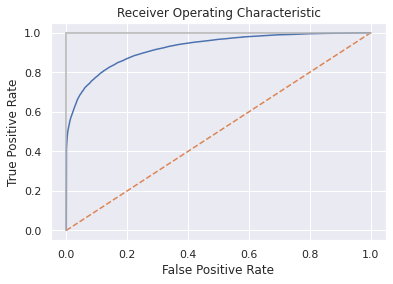

In [ ]:
y_prob = rfl.predict_proba(X_test_std)[:,1]
ROC(y_test, y_prob)

**4) Gaussian Naive Bayes**

In machine learning, Naive Bayes classifiers are a family of simple "probability" classifiers" based on applying Bayes' theorem with strong (naive) independance assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameter linear in the number of variable (features) in learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X_train_std, y_train)
y_gnb1_pred = gnb1.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_gnb1_pred))
print(confusion_matrix(y_test, y_gnb1_pred))
print(classification_report(y_test,y_gnb1_pred))

Accuracy: 0.4844
[[ 4429 17884]
 [  482 12824]]
              precision    recall  f1-score   support

           0       0.90      0.20      0.33     22313
           1       0.42      0.96      0.58     13306

    accuracy                           0.48     35619
   macro avg       0.66      0.58      0.45     35619
weighted avg       0.72      0.48      0.42     35619



**K-fold validation**

In [ ]:
LogQ = GaussianNB()
cv_scores = cross_val_score(LogQ, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.512322282865036


**Evaluate Gaussian Naive Bayes performance using ROC**

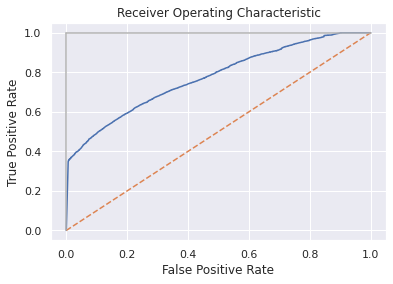

In [ ]:
y_prob = gnb1.predict_proba(X_test_std)[:,1]
ROC(y_test, y_prob)

## **Evaluation**

**Important of Evaluation Element**

In this case, it is important to get a high true positive rate as it used to correctly determine the possibilities of the customer to cancel their bookings so that the hotel can resell their rooms in time. If the true positive rate is high, which mean the customers' booking with associated features are likely to be correctly predicted canceled. Hence, precision are the most important elements of evaluation compared to accuracy and recall because precision indicate how well the prediction goes where the customer's booking with associated features are likely to be canceled. It doesnt matter the predicted numbers are difference from the actual numbers, but it is important for the predict booking really canceled in the predicted range of features. 

**Accuracy**

Accuracy is the ratio of correctly predicted observation over the total observation. A high accuracy score cannot indicate the algorithms with high accuracy perform the best.

In [ ]:
table = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree",
                                "Random Forest", "Gaussian Naive Bayes"],
                     "Accuracy Scores": ["0.804", "0.813", "0.857","0.484"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores
Model,
Random Forest,0.857
Decision Tree,0.813
Logistic Regression,0.804
Gaussian Naive Bayes,0.484


**Precision**

Precision measure the ratio of correctly predicted positive observations to the total predicted positive observations. A higher value of precision indicates that the result are predicted accurately. It is important as a method to investigate the performance of an algorithms in predicting the labels.

In [ ]:
table = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree",
                                "Random Forest", "Gaussian Naive Bayes"],
                     "Precision Scores": ["0.85", "0.75", "0.86","0.42"]})


table["Model"] = table["Model"].astype("category")
table["Precision Scores"] = table["Precision Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Precision Scores', ascending=False)

,Precision Scores
Model,
Random Forest,0.86
Logistic Regression,0.85
Decision Tree,0.75
Gaussian Naive Bayes,0.42


**Recall**

Recall is the ratio of correctly predicted positive observations to the actual observations. It is useful in measuring the number of false positive values in the observation. 

In [ ]:
table = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree",
                                "Random Forest", "Gaussian Naive Bayes"],
                     "Recall Scores": ["0.58", "0.75", "0.74","0.96"]})


table["Model"] = table["Model"].astype("category")
table["Recall Scores"] = table["Recall Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Recall Scores', ascending=False)

,Recall Scores
Model,
Gaussian Naive Bayes,0.96
Decision Tree,0.75
Random Forest,0.74
Logistic Regression,0.58


**F1 Score**

F1 score is the weighted average of precision and recall. Therefore, this score take both false positives and false negatives into the credit. It is a preferred method than accuracy score. F1 score might be a better measure to use if we need to seek a balance between the precision and recall.

In [ ]:
table = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree",
                                "Random Forest", "Gaussian Naive Bayes"],
                     "F1 Scores": ["0.69", "0.75", "0.79","0.58"]})


table["Model"] = table["Model"].astype("category")
table["F1 Scores"] = table["F1 Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'F1 Scores', ascending=False)

,F1 Scores
Model,
Random Forest,0.79
Decision Tree,0.75
Logistic Regression,0.69
Gaussian Naive Bayes,0.58


## **Deployment**
Pros and Conns of Algorithms Used

### **1) Random Forest Classifer**

**Pros**



*   A single decision tree tends to overfit the data. Hence, random forest (the process of averaging or combining the results of different decision trees) helps to overcome the problem of overfitting.
*   It works for large range of data items than single decision trees as it has less variance compare to single decision tree.



**Cons**

*   High Complexity as it harder and time-consuming to contrust than decision trees.
*   Less intuitive and need more computational resources. Large collection of decision trees cause difficult to have an intuitive grasp of the relationship existing in the input data.



###**2) Decision Tree**

**Pros**


*   Perfect for visual representation and easy to understand.
*   Work with numerical and categorical features.

**Cons**



*   Overfitting occurs when the noise in the dataset were capture by the algorithm.
*   As small variance in data, the prediction is unstable.
*   If the decision tree is too complicated leads low bias and makes it difficult for the model to work with new data.



### **3) Logistics Regression**

**Pros**



*   Efficient because no computational resources required.
*   High interpretable as no input features to be scaled, tuning are required. 
*   Easy to regularize and well-calibrated predicted probabilities outputs.






**Cons**



*   Non-linear problems could not solve as the decision surface is linear.




### **4) Gaussian Naive Bayes**

**Pros**



*   Easy and fast prediction class of test data set. 
*   Well perfoem in multi class prediction.
*   Performs better when assumption of independence holds.
*   Less traning data needed.



**Cons**



*   Assumption of independent predictors as hard and impossible to get a set of predictors in real life.
*   "Zero Frequency", when categorical variable has a category in test data set, the model will assign a zero probability which cause unable to make a prediction. Laplace estimation could solve this problem.



## **Result**

The values of precision will be used to determine the algorithm chosen. As Random Forest algorithm has a precision of 0.86, accuracy of 0.86 and f1 score of 0.79 (which is overall higher than other algorithms), so it will be choosen to be in the implementation. 

**Overfitting test**

Usually after the data splitting, the model performance will then evaluated based on the error metric to determine the accuracy of the model. This method however is not very reliable as the accuracy obtained for one test set can be very different to the accuracy for a different test set. Hence, K-fold Cross Validation (CV) is used to provide a solution to this problem by dividing the data into folds and ensuring that each fold is used as testing set at some point. It found that the mean accuracy of using Random Forest is 60.8 %, which is consider average-high accuracy. In other word, the model used to train and predict is not overfitting. 

In [ ]:
LogF = RandomForestClassifier()
cv_scores = cross_val_score(LogF, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6085337915234823


**Feature Importance**

Showing Feature Importance using Random Forest Algorithms to assign score to input features based on how useful they are at predicting a target variable.

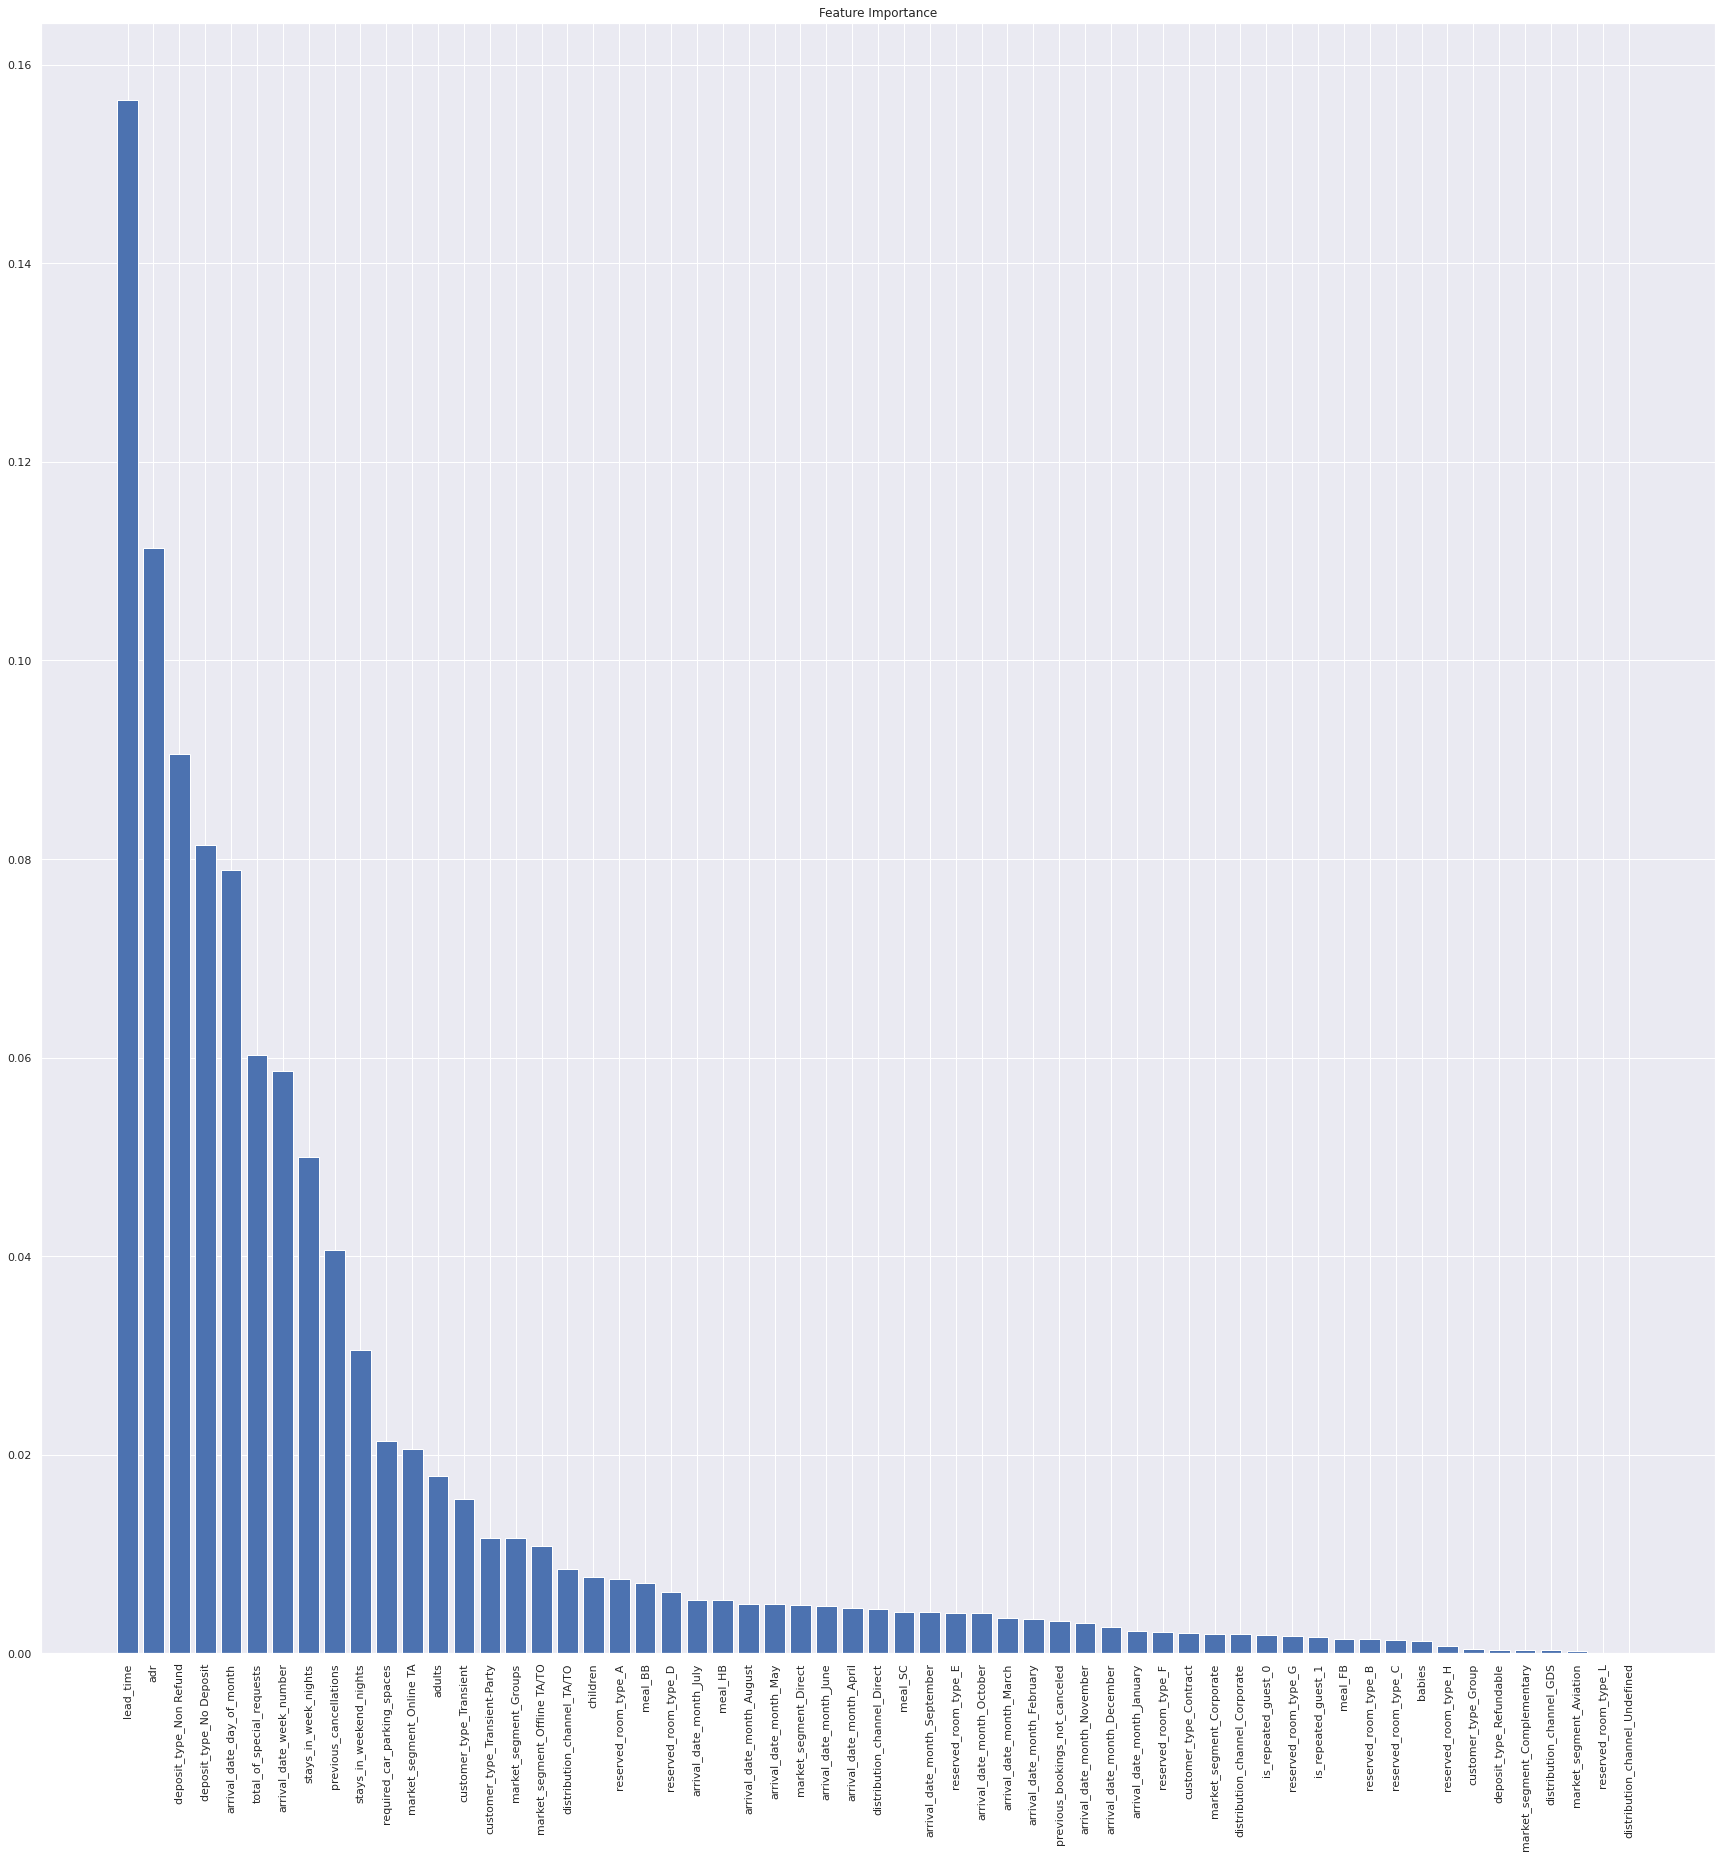

In [ ]:
importances = rfl.feature_importances_ 
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(30,30))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# pring all feature importance
indices = np.argsort(importances)[::-1]
feat_labels = X.columns[:]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) lead_time                      0.156422
 2) adr                            0.111329
 3) deposit_type_Non Refund        0.090532
 4) deposit_type_No Deposit        0.081370
 5) arrival_date_day_of_month      0.078843
 6) total_of_special_requests      0.060226
 7) arrival_date_week_number       0.058620
 8) stays_in_week_nights           0.049950
 9) previous_cancellations         0.040585
10) stays_in_weekend_nights        0.030549
11) required_car_parking_spaces    0.021364
12) market_segment_Online TA       0.020614
13) adults                         0.017827
14) customer_type_Transient        0.015578
15) customer_type_Transient-Party  0.011599
16) market_segment_Groups          0.011594
17) market_segment_Offline TA/TO   0.010840
18) distribution_channel_TA/TO     0.008528
19) children                       0.007708
20) reserved_room_type_A           0.007475
21) meal_BB                        0.007060
22) reserved_room_type_D           0.006210
23) arrival_date_month_July     

As the above bar chart and sorted table, the top 5 features that affecting the booking cancelations are lead_time, adr, deposit_type_non_refund, deposit_type_non deposit, and arrival_date_day_of_month.

# **End**